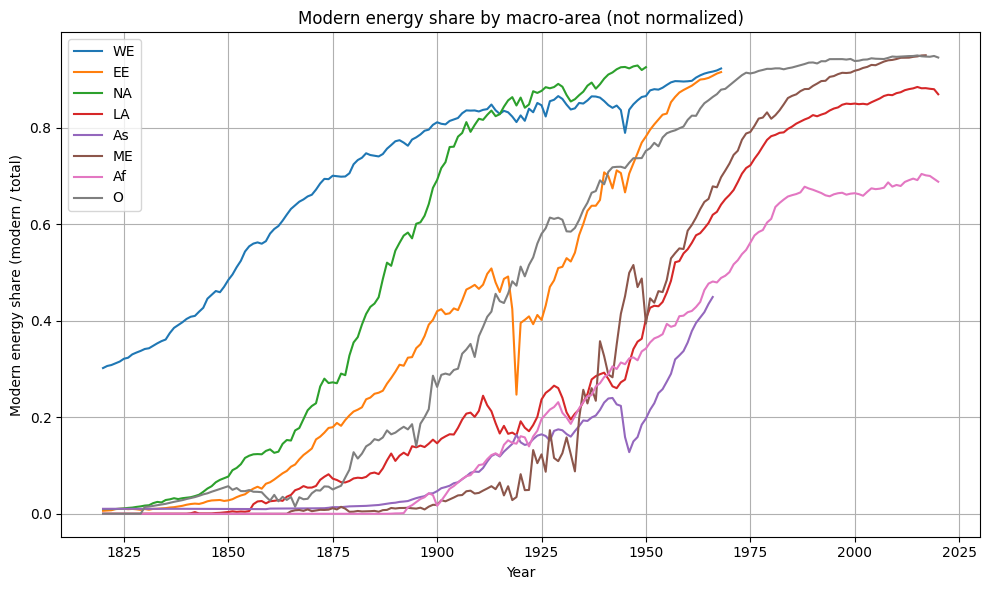

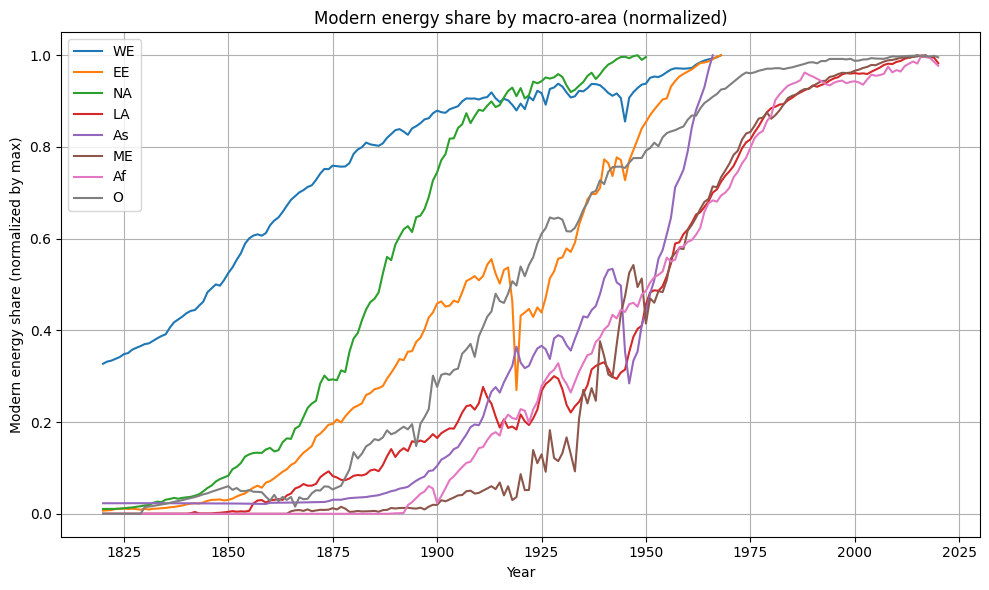

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- 設定 ----------
region_files = {
    "WE": "WE.csv",
    "EE": "EE.csv",
    "NA": "NA.csv",
    "LA": "LA.csv",
    "As": "As.csv",
    "ME": "ME.csv",
    "Af": "Af.csv",
    "O":  "O.csv",
}

modern_cols = ["Coal", "Oil", "Gas", "Electricity", "Nuclear", "Biofuels"]

# 結果保存用
years_dict = {}
modern_rate = {}
modern_rate_norm = {}

# .npy の保存先
out_dir = "modern_rate_npy"
os.makedirs(out_dir, exist_ok=True)

# ---------- 計算 ----------
for region, csv_path in region_files.items():
    df = pd.read_csv(csv_path)

    # 1列目を Year にリネーム（今はヘッダーが空なのでこうする）
    first_col = df.columns[0]
    df = df.rename(columns={first_col: "Year"})

    # 全部文字列扱いになっている可能性があるので数値化（Year 以外）
    for col in df.columns:
        if col != "Year":
            df[col] = pd.to_numeric(df[col], errors="coerce")

    # 完全に空の行は落とす
    df = df.dropna(how="all")

    # Total が NaN の行も落とす
    df = df.dropna(subset=["Total"])

    years = df["Year"].to_numpy(dtype=int)
    years_dict[region] = years

    modern = df[modern_cols].sum(axis=1).to_numpy(dtype=float)
    total = df["Total"].to_numpy(dtype=float)

    rate = modern / total
    modern_rate[region] = rate

    max_val = np.nanmax(rate)
    rate_norm = rate / max_val if max_val > 0 else rate
    modern_rate_norm[region] = rate_norm

    # ---------- .npy で保存 ----------
    np.save(os.path.join(out_dir, f"years_{region}.npy"), years)
    np.save(os.path.join(out_dir, f"modern_rate_{region}.npy"), rate)
    np.save(os.path.join(out_dir, f"modern_rate_norm_{region}.npy"), rate_norm)

# ---------- グラフ（正規化前） ----------
plt.figure(figsize=(10, 6))
for region in region_files.keys():
    plt.plot(years_dict[region], modern_rate[region], label=region)

plt.xlabel("Year")
plt.ylabel("Modern energy share (modern / total)")
plt.title("Modern energy share by macro-area (not normalized)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------- グラフ（正規化後） ----------
plt.figure(figsize=(10, 6))
for region in region_files.keys():
    plt.plot(years_dict[region], modern_rate_norm[region], label=region)

plt.xlabel("Year")
plt.ylabel("Modern energy share (normalized by max)")
plt.title("Modern energy share by macro-area (normalized)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
df_as = pd.read_csv("As.csv")
df_as = df_as.rename(columns={df_as.columns[0]: "Year"})
for col in df_as.columns[1:]:
    df_as[col] = pd.to_numeric(df_as[col], errors="coerce")

print("Asia 年の最初と最後:", df_as["Year"].min(), df_as["Year"].max())
print("末尾15行:")
print(df_as.tail(15))

modern_cols = ["Coal", "Oil", "Gas", "Electricity", "Nuclear", "Biofuels"]
modern = df_as[modern_cols].sum(axis=1)
rate = modern / df_as["Total"]
print("Asia modern share の最大値:", rate.max())


Asia 年の最初と最後: 1820.0 2020.0
末尾15行:
       Year     Food  Fuelwood   Fodder  Coal  Oil      Gas  Electricity  \
187  2006.0  366.417   365.968  126.418   NaN  NaN  308.211      107.529   
188  2007.0  375.346   364.899  133.676   NaN  NaN  334.387      117.028   
189  2008.0  383.586   363.689  134.183   NaN  NaN  361.604      141.326   
190  2009.0  378.439   362.534  133.238   NaN  NaN  373.181      149.555   
191  2010.0  386.095   320.608  123.296   NaN  NaN  412.651      174.935   
192  2011.0  392.821   320.486  123.807   NaN  NaN  454.692      191.446   
193  2012.0  398.736   319.961  124.327   NaN  NaN  486.769      227.178   
194  2013.0  403.213   302.384  124.847   NaN  NaN  506.675      265.024   
195  2014.0  409.297   301.838  125.355   NaN  NaN  526.019      307.815   
196  2015.0  415.545   301.080  124.489   NaN  NaN  530.649      345.573   
197  2016.0  417.744   298.580  123.387   NaN  NaN  544.230      397.426   
198  2017.0  423.167   289.044  124.511   NaN  NaN  5

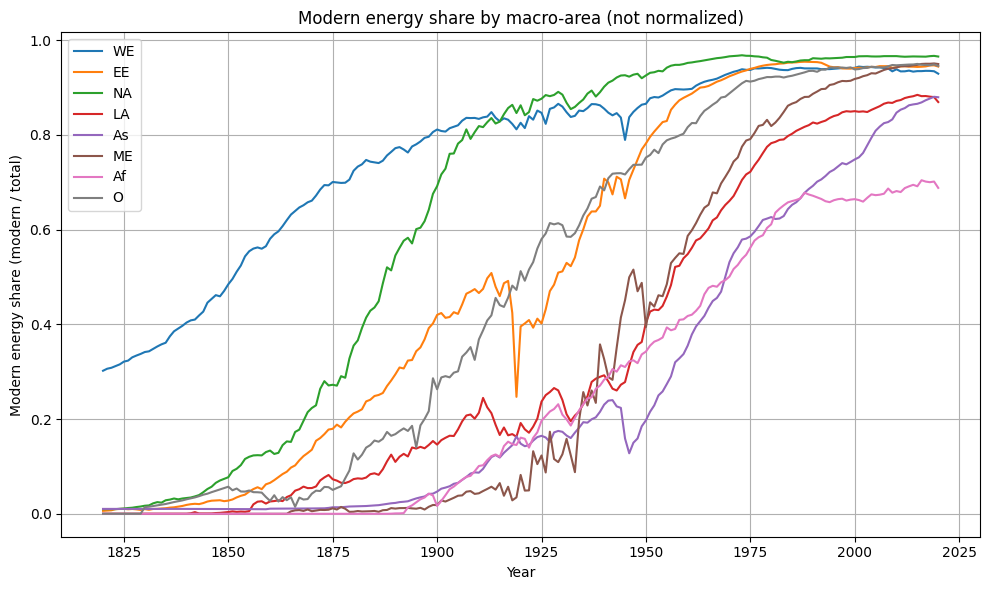

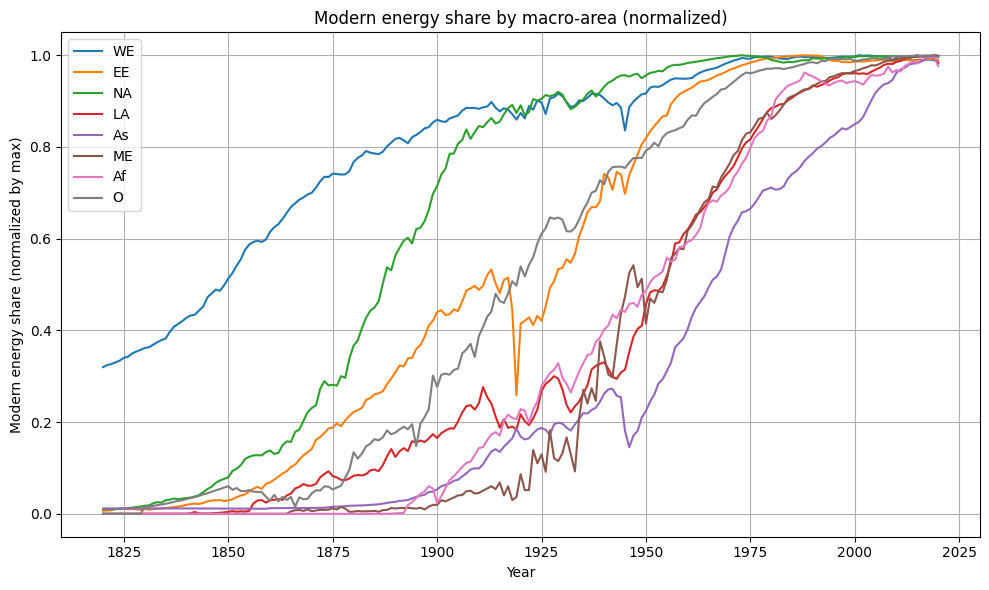

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- 設定 ----------
region_files = {
    "WE": "WE.csv",
    "EE": "EE.csv",
    "NA": "NA.csv",
    "LA": "LA.csv",
    "As": "As.csv",
    "ME": "ME.csv",
    "Af": "Af.csv",
    "O":  "O.csv",
}

modern_cols = ["Coal", "Oil", "Gas", "Electricity", "Nuclear", "Biofuels"]

# 結果保存用
years_dict = {}
modern_rate = {}
modern_rate_norm = {}

# .npy の保存先
out_dir = "modern_rate_npy"
os.makedirs(out_dir, exist_ok=True)

# ---------- 計算 ----------
for region, csv_path in region_files.items():
    # カンマ付き数値をちゃんと読む
    df = pd.read_csv(csv_path, thousands=",")

    # 列名の前後の空白を削除
    df.columns = [str(c).strip() for c in df.columns]

    # 1列目を Year にリネーム（念のため）
    first_col = df.columns[0]
    if first_col != "Year":
        df = df.rename(columns={first_col: "Year"})

    # Year 以外を数値化（カンマ・空白を削除してから）
    for col in df.columns:
        if col != "Year":
            df[col] = (
                df[col]
                .astype(str)
                .str.replace(",", "", regex=False)  # 千の位のカンマを削除
                .str.strip()
                .replace({"": np.nan})
            )
            df[col] = pd.to_numeric(df[col], errors="coerce")

    # modern_cols に無い列があれば 0 列として追加（地域によっては Nuclear 等が無い可能性）
    for col in modern_cols:
        if col not in df.columns:
            df[col] = 0.0

    # 完全に空の行を落とす
    df = df.dropna(how="all")

    # Year が NaN の行を落とす（安全のため）
    df = df.dropna(subset=["Year"])

    # Total が NaN の行も落とす（Total が定義されていない年は使わない）
    df = df.dropna(subset=["Total"])

    # --------- 計算部分 ---------
    years = df["Year"].to_numpy(dtype=int)
    years_dict[region] = years

    modern = df[modern_cols].sum(axis=1).to_numpy(dtype=float)
    total = df["Total"].to_numpy(dtype=float)

    rate = modern / total
    modern_rate[region] = rate

    max_val = np.nanmax(rate)
    rate_norm = rate / max_val if max_val > 0 else rate
    modern_rate_norm[region] = rate_norm

    # ---------- .npy で保存 ----------
    np.save(os.path.join(out_dir, f"years_{region}.npy"), years)
    np.save(os.path.join(out_dir, f"modern_rate_{region}.npy"), rate)
    np.save(os.path.join(out_dir, f"modern_rate_norm_{region}.npy"), rate_norm)

# ---------- グラフ（正規化前） ----------
plt.figure(figsize=(10, 6))
for region in region_files.keys():
    plt.plot(years_dict[region], modern_rate[region], label=region)

plt.xlabel("Year")
plt.ylabel("Modern energy share (modern / total)")
plt.title("Modern energy share by macro-area (not normalized)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------- グラフ（正規化後） ----------
plt.figure(figsize=(10, 6))
for region in region_files.keys():
    plt.plot(years_dict[region], modern_rate_norm[region], label=region)

plt.xlabel("Year")
plt.ylabel("Modern energy share (normalized by max)")
plt.title("Modern energy share by macro-area (normalized)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
